<a href="https://colab.research.google.com/github/Priyesh29sri/Machine-Learning-/blob/main/Music_Recommendation_System_(K_means_clusturing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [46]:
data = {
    'Song_ID': [1, 2, 3, 4, 5, 6, 7, 8],
    'Song_Name': ['Song A', 'Song B', 'Song C', 'Song D', 'Song E', 'Song F', 'Song G', 'Song H'],
    'Artist_Name': ['Artist X', 'Artist Y', 'Artist Z', 'Artist W', 'Artist X', 'Artist Y', 'Artist Z', 'Artist W'],
    'Genre': ['Pop', 'Rock', 'Jazz', 'Classical', 'Pop', 'Rock', 'Electronic', 'Classical'],
    'Tempo': [120, 140, 100, 80, 125, 150, 128, 90],
    'Energy': [0.8, 0.9, 0.6, 0.3, 0.7, 0.9, 0.85, 0.4],
    'Popularity': [85, 90, 70, 65, 78, 88, 92, 60]
}
df = pd.DataFrame(data)

file_path = 'music_data.csv'
df.to_csv(file_path, index=False)

df.head()

,Song_ID,Song_Name,Artist_Name,Genre,Tempo,Energy,Popularity
0,1,Song A,Artist X,Pop,120,0.8,85
1,2,Song B,Artist Y,Rock,140,0.9,90
2,3,Song C,Artist Z,Jazz,100,0.6,70
3,4,Song D,Artist W,Classical,80,0.3,65
4,5,Song E,Artist X,Pop,125,0.7,78


In [47]:
X = df[['Tempo', 'Energy', 'Popularity']]
print(X)

   Tempo  Energy  Popularity
0    120    0.80          85
1    140    0.90          90
2    100    0.60          70
3     80    0.30          65
4    125    0.70          78
5    150    0.90          88
6    128    0.85          92
7     90    0.40          60


In [48]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

df['Cluster'] = kmeans.labels_
print(df)

   Song_ID Song_Name Artist_Name       Genre  Tempo  Energy  Popularity  Cluster
0        1    Song A    Artist X         Pop    120    0.80          85        1
1        2    Song B    Artist Y        Rock    140    0.90          90        2
2        3    Song C    Artist Z        Jazz    100    0.60          70        0
3        4    Song D    Artist W   Classical     80    0.30          65        0
4        5    Song E    Artist X         Pop    125    0.70          78        1
5        6    Song F    Artist Y        Rock    150    0.90          88        2
6        7    Song G    Artist Z  Electronic    128    0.85          92        1
7        8    Song H    Artist W   Classical     90    0.40          60        0


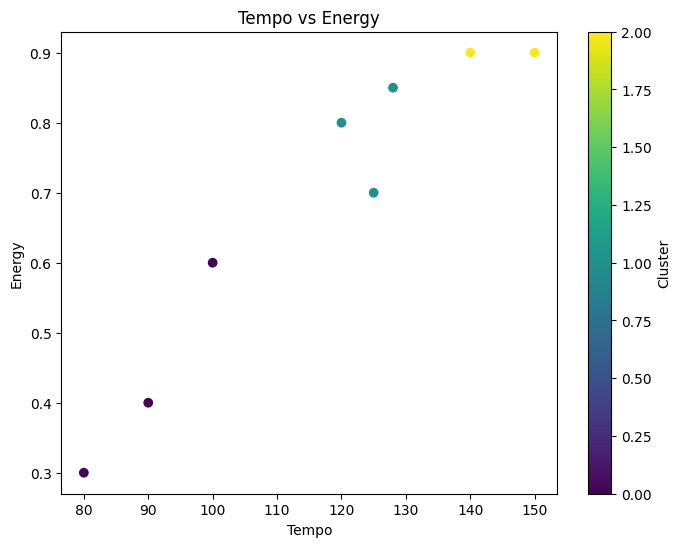

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(X['Tempo'],X['Energy'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Tempo')
plt.ylabel('Energy')
plt.title('Tempo vs Energy')
plt.colorbar(label="Cluster")
plt.show()

In [50]:
for cluster in range(3):
  print(f"\nCluster {cluster}:")
  print(df[df['Cluster'] == cluster][['Song_Name','Artist_Name','Genre']])


Cluster 0:
  Song_Name Artist_Name      Genre
2    Song C    Artist Z       Jazz
3    Song D    Artist W  Classical
7    Song H    Artist W  Classical

Cluster 1:
  Song_Name Artist_Name       Genre
0    Song A    Artist X         Pop
4    Song E    Artist X         Pop
6    Song G    Artist Z  Electronic

Cluster 2:
  Song_Name Artist_Name Genre
1    Song B    Artist Y  Rock
5    Song F    Artist Y  Rock
